#Ejercicio Nº 1


Fichero autos.csv

Generar una función y utilizar esta para recodificar la variable “país de
origen” (1, 2, 3) en el dataframe a través de la función *apply*

In [13]:
import pandas as pd
from google.colab import files
files.upload()
df = pd.read_csv('autos.csv', sep=";")
df

Saving autos.csv to autos (1).csv


Millas_Por_Galon  Cilindros Pais_Origen  Peso_En_Libras  Desplazamiento  \
0                18.0          8         USA            3504           307.0   
1                15.0          8         USA            3693           350.0   
2                18.0          8         USA            3436           318.0   
3                16.0          8         USA            3433           304.0   
4                17.0          8         USA            3449           302.0   
..                ...        ...         ...             ...             ...   
401              27.0          4         USA            2790           140.0   
402              44.0          4      Europe            2130            97.0   
403              32.0          4         USA            2295           135.0   
404              28.0          4         USA            2625           120.0   
405              31.0          4         USA            2720           119.0   

     Aceleracion                     Nombre       Anyo  Caballo_De_Fuerza  
0           12.0  chevrolet chevelle malibu  1/01/1970              130.0  
1           11.5          buick skylark 320  1/01/1970              165.0  
2           11.0         plymouth satellite  1/01/1970              150.0  
3           12.0              amc rebel sst  1/01/1970              150.0  
4           10.5                ford torino  1/01/1970              140.0  
..           ...                        ...        ...                ...  
401         15.6            ford mustang gl  1/01/1982               86.0  
402         24.6                  vw pickup  1/01/1982               52.0  
403         11.6              dodge rampage  1/01/1982               84.0  
404         18.6                ford ranger  1/01/1982               79.0  
405         19.4                 chevy s-10  1/01/1982               82.0  

[406 rows x 9 columns]

Primero checamos la columana de pais de origen para corroborar valores.

In [14]:
df.groupby( by = ['Pais_Origen']).count()

Millas_Por_Galon  Cilindros  Peso_En_Libras  Desplazamiento  \
Pais_Origen                                                                
Europe                     70         73              73              73   
Japan                      79         79              79              79   
USA                       249        254             254             254   

             Aceleracion  Nombre  Anyo  Caballo_De_Fuerza  
Pais_Origen                                                
Europe                73      73    73                 71  
Japan                 79      79    79                 79  
USA                  254     254   254                250

A continuación  corroboramos que tenemos tres paises, los asignaremosde la siguiente manera:

*   1 a Europa
*   2 a Japón
*   3 a USA

Para lo anterior crearemos una función para reescribir nuetro pais de origen


In [15]:
def numeroPais(pais):
  if pais == 'Europe':
    id=1
  if pais == 'Japan':
    id=2
  if pais == 'USA':
    id = 3
  return id

df['Pais_Origen'] = df[['Pais_Origen']].apply(lambda x: numeroPais(*x),axis=1)
df.groupby( by = ['Pais_Origen']).count()

Millas_Por_Galon  Cilindros  Peso_En_Libras  Desplazamiento  \
Pais_Origen                                                                
1                          70         73              73              73   
2                          79         79              79              79   
3                         249        254             254             254   

             Aceleracion  Nombre  Anyo  Caballo_De_Fuerza  
Pais_Origen                                                
1                     73      73    73                 71  
2                     79      79    79                 79  
3                    254     254   254                250

#Ejercicio Nº 2


Generar un Notebook Colab con código y resultados, que contiene
información de autos de un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios con las
variables numéricas:
1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1


Antes que nada tomamos los datos correspondientes a la fecha 1/01/1970 para tener nuestros datos de un periodo de tiempo. 

In [30]:
fs = ["1/01/1982"]       #lista de valores String

df[df["Anyo"].isin(fs)] 
df.tail(10)

Millas_Por_Galon  Cilindros  Pais_Origen  Peso_En_Libras  Desplazamiento  \
396              26.0          4            3            2585           156.0   
397              22.0          6            3            2835           232.0   
398              32.0          4            2            2665           144.0   
399              36.0          4            3            2370           135.0   
400              27.0          4            3            2950           151.0   
401              27.0          4            3            2790           140.0   
402              44.0          4            1            2130            97.0   
403              32.0          4            3            2295           135.0   
404              28.0          4            3            2625           120.0   
405              31.0          4            3            2720           119.0   

     Aceleracion                      Nombre       Anyo  Caballo_De_Fuerza  \
396         14.5  chrysler lebaron medallion  1/01/1982               92.0   
397         14.7              ford granada l  1/01/1982              112.0   
398         13.9            toyota celica gt  1/01/1982               96.0   
399         13.0           dodge charger 2.2  1/01/1982               84.0   
400         17.3            chevrolet camaro  1/01/1982               90.0   
401         15.6             ford mustang gl  1/01/1982               86.0   
402         24.6                   vw pickup  1/01/1982               52.0   
403         11.6               dodge rampage  1/01/1982               84.0   
404         18.6                 ford ranger  1/01/1982               79.0   
405         19.4                  chevy s-10  1/01/1982               82.0   

        log10          Raíz  Valor       Logn        ** Rendimiento  peso  \
396  1.031757  1.238233e+05      5  42.092726  1.347756        Bajo  Bajo   
397  1.198171  1.844348e+05      5  36.246463  0.931422        Bajo  Bajo   
398  1.015348  6.528968e+04      5  42.772982  1.341736        Alto  Bajo   
399  1.016390  2.570190e+04      5  42.729100  1.251852        Alto  Bajo   
400  0.940931  2.003332e+06      5  46.155834  1.982053        Bajo  Bajo   
401  0.953003  3.523935e+05      5  45.571135  1.738286        Bajo  Bajo   
402  0.595837  2.376841e+09      5  72.888181  6.238763        Alto  Bajo   
403  1.065876  6.338009e+03      5  40.745319  0.996741        Alto  Bajo   
404  0.809668  6.552967e+06      5  53.638568  2.883000        Bajo  Bajo   
405  0.787745  1.452300e+07      5  55.131337  3.162689        Bajo  Bajo   

    nivel_desplasamiento  
396                 Alto  
397                 Alto  
398                 Alto  
399                 Alto  
400                 Alto  
401                 Alto  
402                 Alto  
403                 Alto  
404                 Alto  
405                 Alto

Una vez que ya temos nuestros datos revisamos que no contenga  datos. perdidos, para el siguiente ejecicio tomaremos los datos de las variables aceleracion y desplazamiento para la generacion de las nuevas columnas q nos pide nuestro ejercicio. 

In [17]:
pd.DataFrame(df.isna().sum(), 
             columns = ['Datos Null'])

Datos Null
Millas_Por_Galon            8
Cilindros                   0
Pais_Origen                 0
Peso_En_Libras              0
Desplazamiento              0
Aceleracion                 0
Nombre                      0
Anyo                        0
Caballo_De_Fuerza           6

In [18]:
import numpy as np

'''
Log10(var1/var2)
Sqrt(var1)*exp(var2)/200
Si var 1 > var 2 → 5, caso contrario 3
1/logn(var1/var2)*100
var2**2/var1
'''

df['log10']=np.log10(df['Desplazamiento']/df['Aceleracion'])
df['Raíz']=(np.sqrt(df['Desplazamiento']))*(np.exp(df['Aceleracion']))/200

def esMayor(var1,var2):
  if var1 > var2 :
    resultado = 5
  else:
    resultado = 3
  return resultado

df['Valor'] = df[['Desplazamiento','Aceleracion']].apply(lambda x: esMayor(*x),axis=1)
df['Logn'] =1/np.log(df['Desplazamiento']/df['Aceleracion'])*100
df['**'] = df['Aceleracion']**2/df['Desplazamiento']
df.head(20)

Millas_Por_Galon  Cilindros  Pais_Origen  Peso_En_Libras  Desplazamiento  \
0               18.0          8            3            3504           307.0   
1               15.0          8            3            3693           350.0   
2               18.0          8            3            3436           318.0   
3               16.0          8            3            3433           304.0   
4               17.0          8            3            3449           302.0   
5               15.0          8            3            4341           429.0   
6               14.0          8            3            4354           454.0   
7               14.0          8            3            4312           440.0   
8               14.0          8            3            4425           455.0   
9               15.0          8            3            3850           390.0   
10               NaN          4            1            3090           133.0   
11               NaN          8            3            4142           350.0   
12               NaN          8            3            4034           351.0   
13               NaN          8            3            4166           383.0   
14               NaN          8            3            3850           360.0   
15              15.0          8            3            3563           383.0   
16              14.0          8            3            3609           340.0   
17               NaN          8            3            3353           302.0   
18              15.0          8            3            3761           400.0   
19              14.0          8            3            3086           455.0   

    Aceleracion                            Nombre       Anyo  \
0          12.0         chevrolet chevelle malibu  1/01/1970   
1          11.5                 buick skylark 320  1/01/1970   
2          11.0                plymouth satellite  1/01/1970   
3          12.0                     amc rebel sst  1/01/1970   
4          10.5                       ford torino  1/01/1970   
5          10.0                  ford galaxie 500  1/01/1970   
6           9.0                  chevrolet impala  1/01/1970   
7           8.5                 plymouth fury iii  1/01/1970   
8          10.0                  pontiac catalina  1/01/1970   
9           8.5                amc ambassador dpl  1/01/1970   
10         17.5              citroen ds-21 pallas  1/01/1970   
11         11.5  chevrolet chevelle concours (sw)  1/01/1970   
12         11.0                  ford torino (sw)  1/01/1970   
13         10.5           plymouth satellite (sw)  1/01/1970   
14         11.0                amc rebel sst (sw)  1/01/1970   
15         10.0               dodge challenger se  1/01/1970   
16          8.0                plymouth 'cuda 340  1/01/1970   
17          8.0             ford mustang boss 302  1/01/1970   
18          9.5             chevrolet monte carlo  1/01/1970   
19         10.0           buick estate wagon (sw)  1/01/1970   

    Caballo_De_Fuerza     log10          Raíz  Valor       Logn        **  
0               130.0  1.407957  1.425847e+04      5  30.845718  0.469055  
1               165.0  1.483370  9.234015e+03      5  29.277552  0.377857  
2               150.0  1.461034  5.338544e+03      5  29.725137  0.380503  
3               150.0  1.403692  1.418863e+04      5  30.939435  0.473684  
4               140.0  1.458818  3.155481e+03      5  29.770306  0.365066  
5               198.0  1.632457  2.281096e+03      5  26.603727  0.233100  
6               220.0  1.702813  8.632732e+02      5  25.504527  0.178414  
7               215.0  1.714034  5.154653e+02      5  25.337569  0.164205  
8               225.0  1.658011  2.349203e+03      5  26.193697  0.219780  
9               190.0  1.661646  4.852945e+02      5  26.136407  0.185256  
10              115.0  0.880814  2.296409e+06      5  49.306060  2.302632  
11              165.0  1.483370  9.234015e+03      5  29.277552  0

#Ejercicio Nº 3

Crear una función que permita generar 3 variables cualitativas
ordinales a partir de las variables numéricas con los siguientes criterios:


* Si es mayor a la “media + 1*desviación estándar” → Alto
* Si está entre “media - 1*desviación estándar” y “media +
  1*desviación estándar” → Medio


* Si es menor a la “media - 1*desviación estándar” → Bajo



  
  
**Nota:** Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.
La función debe contar con su respectiva documentación.


In [19]:
milla= pd.Series(df['Millas_Por_Galon'])
peso =pd.Series(df['Peso_En_Libras'])
desplazamiento= pd.Series(df['Desplazamiento'])
# checamos e sustituimos nulls
df.fillna(value=milla.mean(), inplace=True)

pd.DataFrame(df.isna().sum(), 
             columns = ['Datos Null'])


Datos Null
Millas_Por_Galon            0
Cilindros                   0
Pais_Origen                 0
Peso_En_Libras              0
Desplazamiento              0
Aceleracion                 0
Nombre                      0
Anyo                        0
Caballo_De_Fuerza           0
log10                       0
Raíz                        0
Valor                       0
Logn                        0
**                          0

crearemos. una fucion para los calculos que se requieren 

In [20]:
def nivel(media,desviacion,campo):
  '''
  media es el promedio de una serie
  desviacion estandae de la misma serie
  dato de comparacion
  '''
  if campo > (media +1* desviacion ):
    respuesta = 'Alto'
  if (campo <=(media -1*desviacion)) and  campo >=(media+1* desviacion):
    respursta = 'Medio'
  if campo <=(media+1* desviacion):
    respuesta = 'Bajo'
  return respuesta

df['Rendimiento']= df['Millas_Por_Galon'].apply(lambda x: nivel(milla.mean(),milla.std(),x))
df['peso']= df['Peso_En_Libras'].apply(lambda x: nivel(peso.mean(),peso.std(),x))
df['nivel_desplasamiento']= df['Peso_En_Libras'].apply(lambda x: nivel(desplazamiento.mean(),desplazamiento.std(),x))
df

Millas_Por_Galon  Cilindros  Pais_Origen  Peso_En_Libras  Desplazamiento  \
0                18.0          8            3            3504           307.0   
1                15.0          8            3            3693           350.0   
2                18.0          8            3            3436           318.0   
3                16.0          8            3            3433           304.0   
4                17.0          8            3            3449           302.0   
..                ...        ...          ...             ...             ...   
401              27.0          4            3            2790           140.0   
402              44.0          4            1            2130            97.0   
403              32.0          4            3            2295           135.0   
404              28.0          4            3            2625           120.0   
405              31.0          4            3            2720           119.0   

     Aceleracion                     Nombre       Anyo  Caballo_De_Fuerza  \
0           12.0  chevrolet chevelle malibu  1/01/1970              130.0   
1           11.5          buick skylark 320  1/01/1970              165.0   
2           11.0         plymouth satellite  1/01/1970              150.0   
3           12.0              amc rebel sst  1/01/1970              150.0   
4           10.5                ford torino  1/01/1970              140.0   
..           ...                        ...        ...                ...   
401         15.6            ford mustang gl  1/01/1982               86.0   
402         24.6                  vw pickup  1/01/1982               52.0   
403         11.6              dodge rampage  1/01/1982               84.0   
404         18.6                ford ranger  1/01/1982               79.0   
405         19.4                 chevy s-10  1/01/1982               82.0   

        log10          Raíz  Valor       Logn        ** Rendimiento  peso  \
0    1.407957  1.425847e+04      5  30.845718  0.469055        Bajo  Bajo   
1    1.483370  9.234015e+03      5  29.277552  0.377857        Bajo  Bajo   
2    1.461034  5.338544e+03      5  29.725137  0.380503        Bajo  Bajo   
3    1.403692  1.418863e+04      5  30.939435  0.473684        Bajo  Bajo   
4    1.458818  3.155481e+03      5  29.770306  0.365066        Bajo  Bajo   
..        ...           ...    ...        ...       ...         ...   ...   
401  0.953003  3.523935e+05      5  45.571135  1.738286        Bajo  Bajo   
402  0.595837  2.376841e+09      5  72.888181  6.238763        Alto  Bajo   
403  1.065876  6.338009e+03      5  40.745319  0.996741        Alto  Bajo   
404  0.809668  6.552967e+06      5  53.638568  2.883000        Bajo  Bajo   
405  0.787745  1.452300e+07      5  55.131337  3.162689        Bajo  Bajo   

    nivel_desplasamiento  
0                   Alto  
1                   Alto  
2                   Alto  
3                   Alto  
4                   Alto  
..                   ...  
401                 Alto  
402                 Alto  
403                 Alto  
404                 Alto  
405                 Alto  

[406 rows x 17 columns]

#Ejercicio Nº 4

Crear una función que muestre los siguientes gráficos
(simultáneamente) para las variables numéricas, según una variable
cualitativa:


*   Cajas y bigotes
*   Barras de la media
*   Histograma con densidad (Curva)

La función debe contar con su respectiva documentación.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as msno





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


<Figure size 432x288 with 0 Axes>

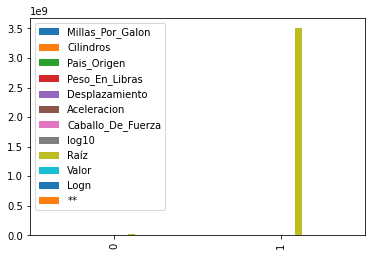

In [22]:
#cajas y bigotes
fig, ax = plt.subplots(figsize=(16, 13.84))

sns.boxplot( 
        x     = 'Aceleracion',  # variable cualitativa
        y     = 'Millas_Por_Galon',  # variable cuantitativa
        data  = df,   # dataframe
        ax    = ax
    )

ax.set_title('Aceleración - Millas');

#barras de. media
columnas = ['Millas_Por_Galon', 'Cilindros', 'Pais_Origen', 'Peso_En_Libras',
       'Desplazamiento', 'Aceleracion', 'Nombre', 'Anyo', 'Caballo_De_Fuerza',
       'log10', 'Raíz', 'Valor', 'Logn', '**']
df2 = df[columnas].mean()
df3 = df[columnas].max()
dffinal= pd.concat([df2,df3],axis=1,join='inner')
dft=dffinal.T
dft
plt.figure()
dft.plot(kind='bar')

#hiostogramas

cols_num = ['Millas_Por_Galon']

for i in cols_num:
  fig, ax = plt.subplots(figsize=(10,7),) 
  sns.kdeplot(data=df, x=i, hue="Rendimiento", fill=True, alpha=.5, 
              linewidth=0, palette='crest')  # Paletas de ['flare', 'crest', 'magma', 'viridis', 'rocket_r','cubehelix']
  plt.show()

#Ejercicio Nº 5

**Crear una función** que devuelva un mapa de calor con la correlación
de todas las variables numéricas (incluye las generadas), para cada país.





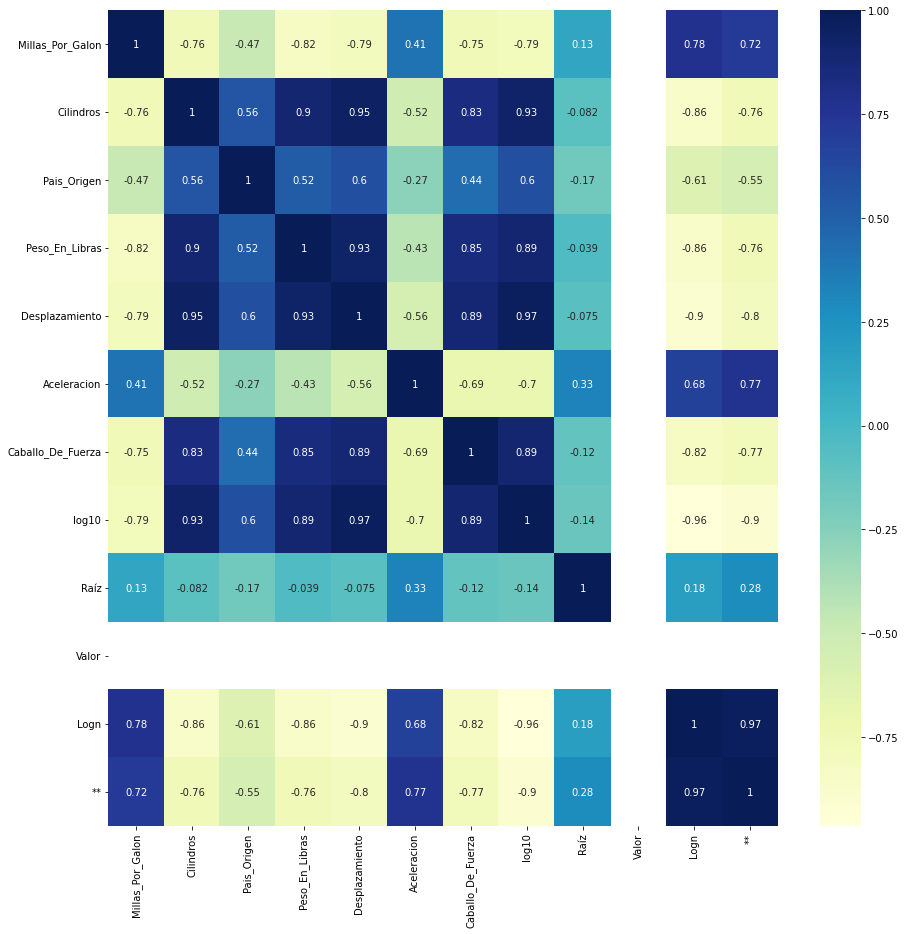

In [23]:
plt.figure(figsize=(15,15))
correlacion = df.corr() # pearson

sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True,
            cmap = "YlGnBu"  
            );